# Problem Statement:Clustering of countries with PCA assignment

categorising the countries using some socio-economic and health factors that determine the overall development of the country and suggesting the countries which are in dire need of aid.

## Import Python libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

##  Import dataset

In [25]:
country_data= pd.read_csv("C:\DataScienceUpgrad\Main Course\Course 3-Machine Learning I\Module 6-Clustering & PCA assignment\Country-data.csv")
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## check structure of data

In [26]:
country_data.shape

(167, 10)

In [27]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [28]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


No missing value present in the data set

## Data Preperation

In [29]:
# convert exports, health and imports columns from % of GDP to absolute terms

country_data['exports']=country_data['exports']*country_data['gdpp']/100
country_data['health']=country_data['health']*country_data['gdpp']/100
country_data['imports']=country_data['imports']*country_data['gdpp']/100

country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Outlier treatment

In [30]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
country_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


we can see column exports,health,imports, income,inflation,gdpp have outliers present

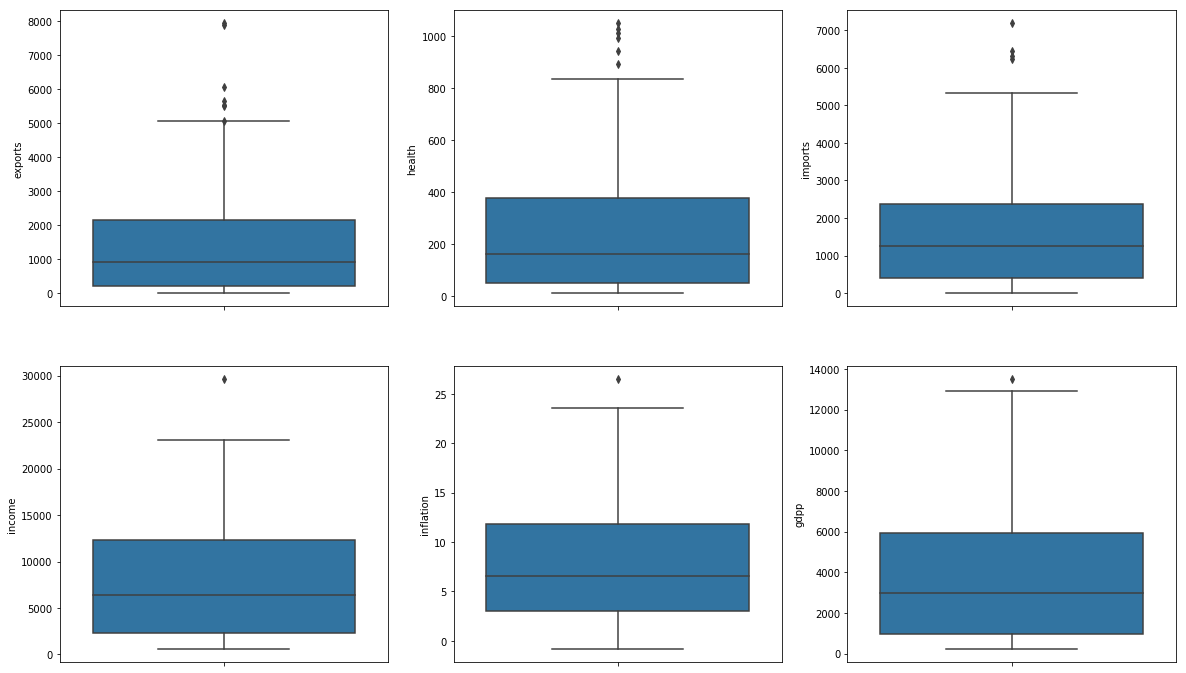

In [33]:
### Lets make boxplot for variables exports,health,imports,income,inflation,gdpp
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(y=country_data['exports'])
plt.subplot(2,3,2)
sns.boxplot(y=country_data['health'])
plt.subplot(2,3,3)
sns.boxplot(y=country_data['imports'])
plt.subplot(2,3,4)
sns.boxplot(y=country_data['income'])
plt.subplot(2,3,5)
sns.boxplot(y=country_data['inflation'])
plt.subplot(2,3,6)
sns.boxplot(y=country_data['gdpp'])

There are many countries for which exports,health,imports,income,inflation,gdpp have very high values so we can remove  them as they  represent a separate cluster of most developed countries and our objective is to find the most underdeveloped countries.

In [32]:
# removing (statistical) outliers
# outlier treatment for exports
Q1=country_data.exports.quantile(0.05)
Q3=country_data.exports.quantile(0.75)
IQR=Q3-Q1
country_data=country_data[(country_data.exports >= Q1-1.5*IQR)&(country_data.exports <= Q3+1.5*IQR)]

# outlier treatment for health
Q1=country_data.health.quantile(0.05)
Q3=country_data.health.quantile(0.75)
IQR=Q3-Q1
country_data=country_data[(country_data.health >= Q1-1.5*IQR)&(country_data.health <= Q3+1.5*IQR)]

# outlier treatment for imports
Q1=country_data.imports.quantile(0.05)
Q3=country_data.imports.quantile(0.75)
IQR=Q3-Q1

country_data=country_data[(country_data.imports >= Q1-1.5*IQR)&(country_data.imports <= Q3+1.5*IQR)]

# outlier treatment for income
Q1=country_data.income.quantile(0.05)
Q3=country_data.income.quantile(0.75)
IQR=Q3-Q1
country_data=country_data[(country_data.income >= Q1-1.5*IQR)&(country_data.income <= Q3+1.5*IQR)]

# outlier treatment for inflation
Q1=country_data.inflation.quantile(0.05)
Q3=country_data.inflation.quantile(0.75)
IQR=Q3-Q1
country_data=country_data[(country_data.inflation >= Q1-1.5*IQR)&(country_data.inflation <= Q3+1.5*IQR)]

# outlier treatment for gdpp
Q1=country_data.gdpp.quantile(0.05)
Q3=country_data.gdpp.quantile(0.75)
IQR=Q3-Q1
country_data=country_data[(country_data.gdpp >= Q1-1.5*IQR)&(country_data.gdpp <= Q3+1.5*IQR)]


country_data.shape

(119, 10)

Now we left with 119 countries after removing outliers 

###  Scaling the data

In [34]:
# applying scaling on numerical columns of country dataframe
country_data_num=country_data.drop('country', axis=1)

country_data_num.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [35]:
scaler=StandardScaler()
country_data_num_scaled=scaler.fit_transform(country_data_num)
country_data_num_scaled.shape

C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(119, 9)

In [36]:
country_data_num_scaled=pd.DataFrame(country_data_num_scaled)
country_data_num_scaled.columns=[country_data_num.columns]
country_data_num_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.014287,-0.864572,-0.819941,-0.897015,-0.991365,0.230404,-1.362677,1.611667,-0.962646
1,-0.801161,-0.226579,0.049073,0.184123,0.319242,-0.573017,1.054190,-1.093232,0.048468
2,-0.537231,0.105582,-0.265929,-0.180909,0.787091,1.311371,1.078238,-0.288898,0.154239
3,1.724680,0.390393,-0.594253,-0.110097,-0.315583,2.333907,-0.893732,1.832211,-0.111618
4,-0.956560,2.352436,1.847901,3.414938,1.763746,-1.068054,1.114311,-0.781877,2.366853


### PCA on the data

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca=PCA(svd_solver='randomized',random_state=42)

In [39]:
# doing pca on scaled data
pca.fit(country_data_num_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [40]:
pca.components_

array([[-0.33516631,  0.34933657,  0.35603797,  0.3640437 ,  0.38170322,
        -0.08659578,  0.31548409, -0.32622198,  0.38365283],
       [ 0.38633106,  0.33636095,  0.17754419,  0.1227425 ,  0.23602355,
         0.54198193, -0.36807652,  0.37361987,  0.25787264],
       [-0.31162319, -0.174681  , -0.10560646, -0.27057298,  0.05144114,
         0.7912929 ,  0.35764356, -0.16457472, -0.06504371],
       [ 0.10868874, -0.51871359,  0.68322375, -0.39015448,  0.02906042,
        -0.06163542, -0.09743426, -0.0642807 ,  0.28607496],
       [ 0.10243094,  0.03238163, -0.16688237, -0.07386017,  0.15971201,
         0.08067262, -0.56667298, -0.77439925, -0.04822675],
       [ 0.38301238,  0.14085033, -0.30877012, -0.5269776 ,  0.52934749,
        -0.21344454,  0.33718347,  0.00454177,  0.14469853],
       [ 0.68632961, -0.06721629,  0.13646588,  0.33035855, -0.25927614,
         0.1277877 ,  0.437102  , -0.32497081, -0.12828068],
       [-0.03141828,  0.65769457,  0.26899886, -0.48436374, -0

In [41]:
pca.explained_variance_ratio_

array([0.66327965, 0.11538122, 0.11336152, 0.04022895, 0.03321665,
       0.01561798, 0.01114617, 0.00559211, 0.00217574])

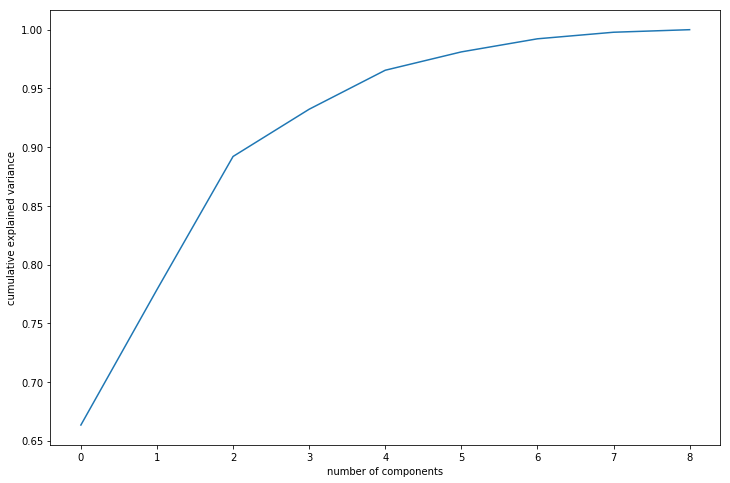

In [42]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig=plt.figure(figsize=(12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 4 components are enough to explain more than 95 % of variance in the data set 

##### We will choose first 4 principle components for further clustering 

In [43]:
# new dataset with 4 PCs
pca_final=PCA(n_components=4)
country_data_num_pca=pca_final.fit_transform(country_data_num_scaled)
country_data_num_pca.shape

(119, 4)

In [44]:
country_data_num_pca=pd.DataFrame(country_data_num_pca)
country_data_num_pca.columns=['PC1','PC2','PC3','PC4']
country_data_num_pca.head()

,PC1,PC2,PC3,PC4
0,-2.983809,0.591734,-0.394410,0.059251
1,1.153159,-1.373607,0.351026,0.018165
2,0.736868,0.190019,1.727309,-0.324581
3,-1.938387,2.853770,0.703558,-0.593751
4,5.323887,0.914450,-1.613140,-0.658161


### Clustering

#### KMeans clustering

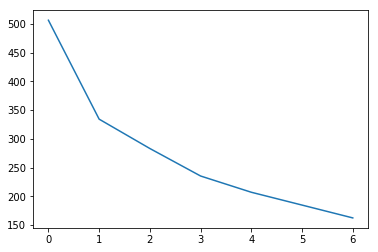

In [45]:
# Finding the optimum number of clusters
# elbow curve/SSD
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(country_data_num_pca)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)
    

from elbow curve 3 clusters looks fine. lets also check silhouette score

In [46]:
# Silhouette analysis

range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_data_num_pca)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_data_num_pca, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    



For n_clusters=2, the silhouette score is 0.3992122269249625
For n_clusters=3, the silhouette score is 0.381164478597541
For n_clusters=4, the silhouette score is 0.33718845229979555
For n_clusters=5, the silhouette score is 0.3203286071204034
For n_clusters=6, the silhouette score is 0.2879867147236773
For n_clusters=7, the silhouette score is 0.30003353719389997
For n_clusters=8, the silhouette score is 0.288704666532268


maximum silhouette score we are getting is for k=2.but for k=3 also the score is comparable so lets take k=3 for final model

In [47]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(country_data_num_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [48]:
kmeans.labels_

array([0, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0,
       1, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 2, 2, 0, 0, 2,
       1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1,
       2, 2, 2, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 1, 2,
       1, 0, 1, 2, 1, 1, 1, 0, 0])

In [49]:
# assign the labels to original dataframe
country_data['kmeans_cluster_id']=kmeans.labels_
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2


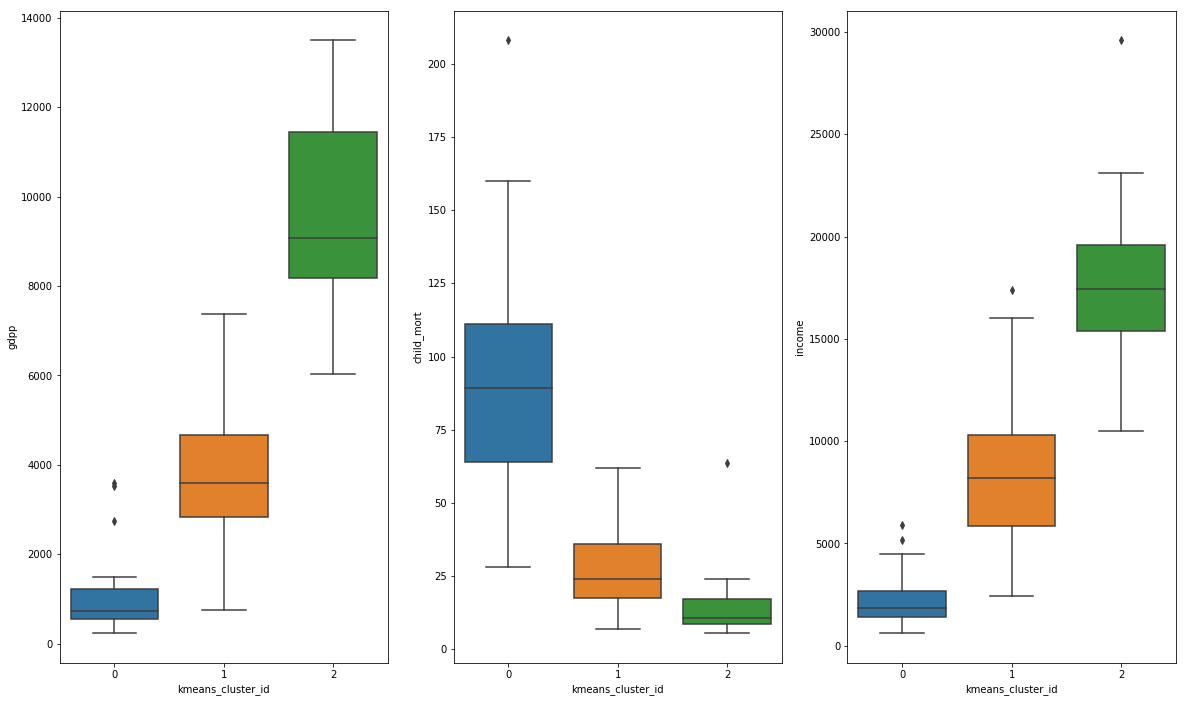

In [50]:
# plot
plt.figure(figsize=(20,12))
plt.subplot(1,3,1)
sns.boxplot(x='kmeans_cluster_id', y='gdpp', data=country_data)
plt.subplot(1,3,2)
sns.boxplot(x='kmeans_cluster_id', y='child_mort', data=country_data)
plt.subplot(1,3,3)
sns.boxplot(x='kmeans_cluster_id', y='income', data=country_data)


#### from the above plots it is clear that kmeans_cluster_id=0 represent the group of most underdeveloped countries which have lowest #### gdpp, lowest income per person and very high child mortality rate .They are the one which are in dire need of help

In [51]:
# list of countries in dire need of help
country_data[country_data.kmeans_cluster_id==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_id
0,Afghanistan,90.2,55.30000,41.9174,248.297000,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,2199.19000,100.6050,1514.370000,5900,22.400,60.1,6.16,3530,0
17,Benin,111.0,180.40400,31.0780,281.976000,1820,0.885,61.8,5.36,758,0
25,Burkina Faso,116.0,110.40000,38.7550,170.200000,1430,6.810,57.9,5.87,575,0
26,Burundi,93.6,20.60520,26.7960,90.552000,764,12.300,57.7,6.26,231,0
28,Cameroon,108.0,290.82000,67.2030,353.700000,2660,1.910,57.3,5.11,1310,0
31,Central African Republic,149.0,52.62800,17.7508,118.190000,888,2.010,47.5,5.21,446,0
32,Chad,150.0,330.09600,40.6341,390.195000,1930,6.390,56.5,6.59,897,0
36,Comoros,88.2,126.88500,34.6819,397.573000,1410,3.870,65.9,4.75,769,0
37,"Congo, Dem. Rep.",116.0,137.27400,26.4194,165.664000,609,20.800,57.5,6.54,334,0


In [53]:
country_data[country_data.kmeans_cluster_id==0].country.count()

45

45 countries are present in cluster of underdeveloped countries

### Visulizing the clusters

Text(0, 0.5, 'Child Mortality')

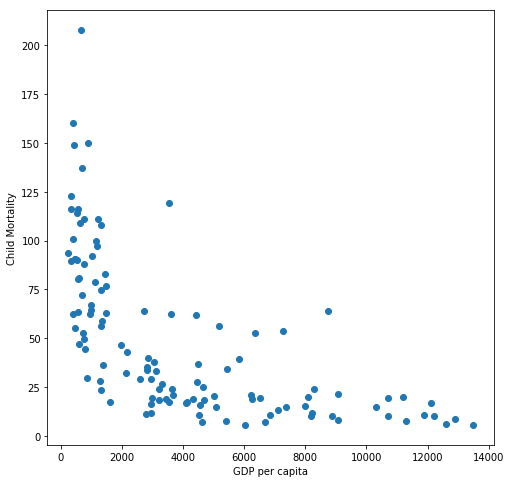

In [54]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(country_data.gdpp, country_data.child_mort)
plt.xlabel('GDP per capita')
plt.ylabel('Child Mortality')

#### here we can visualize 3 clusters
#### cluster1 : countries in verticle line with very low gdp and very high child mortality
#### cluster2: countries with moderate gdp and low child mortality
#### cluster3: countries with high gdp and very low child mortality


Text(0, 0.5, 'PC2')

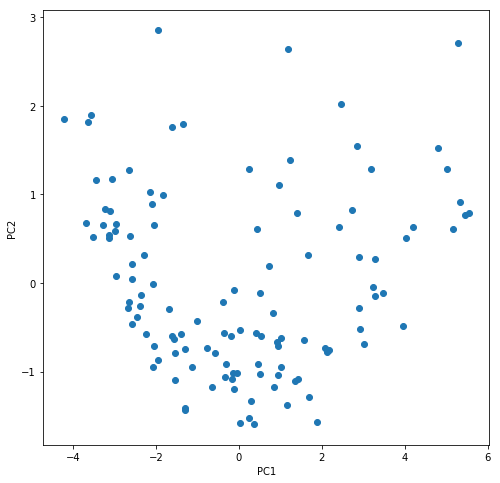

In [55]:
# visualizing clusters with PCs
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(country_data_num_pca.PC1, country_data_num_pca.PC2)
plt.xlabel('PC1')
plt.ylabel('PC2')

#### in terms of PC1 and PC2 clusters are not very clear visually like we had with 2 original components

### Hierarchical clustering

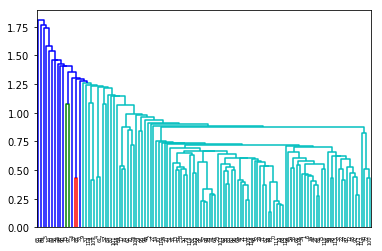

In [56]:
# single linkage
mergings=linkage(country_data_num_pca, method="single", metric="euclidean")
dendrogram(mergings)
plt.show()

In [64]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

for single linkage almost all the countries are getting assigned to single cluster we are not able to divide the countries in to proper segments by this method. Lets try complete linkage now

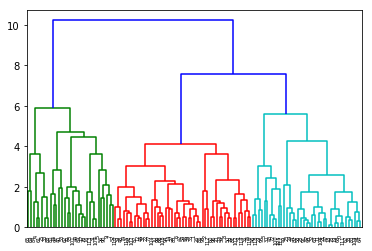

In [65]:
# complete linkage
mergings=linkage(country_data_num_pca, method="complete", metric="euclidean")
dendrogram(mergings)
plt.show()

In [66]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2, 0, 0, 1, 0,
       1, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0,
       2, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 0, 0, 1, 1, 2, 2, 0, 0, 2,
       1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 1,
       2, 2, 2, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2,
       1, 0, 1, 2, 1, 1, 1, 0, 0])

In [67]:
# assign cluster labels
country_data['complete_linkage_cluster_id'] = cluster_labels
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_id,complete_linkage_cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2,2


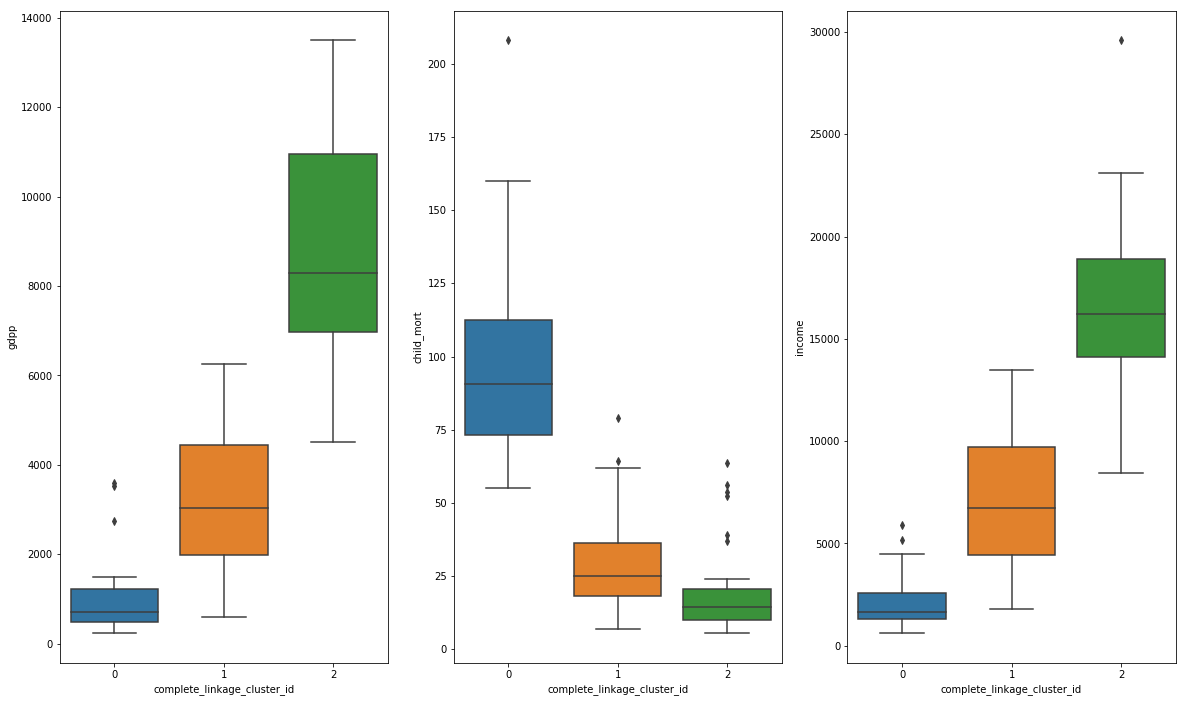

In [68]:
# plot
plt.figure(figsize=(20,12))
plt.subplot(1,3,1)
sns.boxplot(x='complete_linkage_cluster_id', y='gdpp', data=country_data)
plt.subplot(1,3,2)
sns.boxplot(x='complete_linkage_cluster_id', y='child_mort', data=country_data)
plt.subplot(1,3,3)
sns.boxplot(x='complete_linkage_cluster_id', y='income', data=country_data)

from the above plots it is clear that here also complete_linkage_cluster_id=0 represent the group of underdeveloped countries which have lowest gdpp, lowest income per person and very high child mortality rate .They are the one which are in dire need of help

In [69]:
# list of countries in dire need of help
country_data[country_data.complete_linkage_cluster_id==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_id,complete_linkage_cluster_id
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,0,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,0,0
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,0,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,0,0
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,0,0
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310,0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,0,0
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897,0,0
36,Comoros,88.2,126.8850,34.6819,397.573,1410,3.870,65.9,4.75,769,0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,0,0


In [70]:
country_data[country_data.complete_linkage_cluster_id==0].country.count()

39

By using complete linkage hierarchical clustering we got 39 countries which are underdeveloped and in dire need of help.

Few Recommended countries for extending help are :
    Haiti,
    Sierra Leone,
    Chad,
    Central African Republic,
    Mali,
    Niger
    